In [19]:
# imports

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Make Python scripts available to Jupyter notebook
%run helper_functions

In [50]:
# Get data set

# Set Path
file_name = 'mba_data.csv'
file_path = refactor_path(f"{os.getcwd()}/Data_Sets/{file_name}")

# Convert Pandas dataframe
df = pd.read_csv(file_path)

In [44]:
# Explore data set

# Display dataframe
print(f"DataFrame:\n{df}")

# Display summary
print(f"\nSummary:")
df.info()

# Display statistics
print(f"\nStatistics:")
df.describe(include='all')


DataFrame:
      application_id  international   gpa   gmat  work_exp admission  \
0                  1          False  3.30  620.0       3.0     Admit   
1                  2          False  3.28  680.0       5.0      Pass   
3                  4          False  3.47  690.0       6.0      Pass   
4                  5          False  3.35  590.0       5.0      Pass   
5                  6          False  3.18  610.0       6.0      Pass   
...              ...            ...   ...    ...       ...       ...   
6187            6188          False  3.03  570.0       6.0      Pass   
6188            6189          False  3.12  630.0       4.0      Pass   
6189            6190          False  3.49  640.0       5.0      Pass   
6190            6191          False  3.18  670.0       4.0      Pass   
6193            6194          False  3.23  650.0       4.0      Pass   

      gender_Female  gender_Male  major_Business  major_Humanities  ...  \
0                 1            0               1 

,application_id,international,gpa,gmat,work_exp,admission,gender_Female,gender_Male,major_Business,major_Humanities,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
count,4352.000000,4352,4352.000000,4352.000000,4352.000000,4352,4352.000000,4352.000000,4352.000000,4352.000000,...,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000
unique,NaN,1,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,False,NaN,NaN,NaN,Pass,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4352,NaN,NaN,NaN,3660,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3088.142004,NaN,3.253527,651.567096,5.023897,NaN,0.365809,0.634191,0.292969,0.404412,...,0.056066,0.092831,0.027114,0.009421,0.102941,0.067325,0.149127,0.017004,0.005744,0.115809
std,1787.041316,NaN,0.151759,49.494137,1.030172,NaN,0.481712,0.481712,0.455177,0.490834,...,0.230076,0.290229,0.162434,0.096614,0.303917,0.250613,0.356254,0.129300,0.075583,0.320032
min,1.000000,NaN,2.730000,570.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1533.500000,NaN,3.150000,610.000000,4.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3101.500000,NaN,3.250000,650.000000,5.000000,NaN,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4616.250000,NaN,3.360000,690.000000,6.000000,NaN,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
# Prep dataset

# Fill admission Nulls with 'Pass'
df['admission'] = df['admission'].fillna(value='Pass')

# Drop any other rows with nulls
df.dropna(inplace=True) 

# Determine feature columns needing encoding
encode_columns = []
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]): 
        encode_columns.append(col)

# Remove the label column from the list
encode_columns.remove('admission')

# OneHot Encode via Pandas
df = pd.get_dummies(df, columns=encode_columns, dtype='int')


In [53]:
# Set the features and the label

# Label
y_label_name = 'admission'
y_label_classes = df[y_label_name].unique()
print(f"y_label_classes: {y_label_classes}")

# Features
x_feature_names = list(df.columns)
x_feature_names.remove(y_label_name)
print(f"x_feature_names: {x_feature_names}")

# Convert to NumPy arrays
np_x_feature = df[x_feature_names].to_numpy() 
np_y_label = df[y_label_name].to_numpy()



y_label_classes: ['Admit' 'Pass' 'Waitlist']
x_feature_names: ['application_id', 'international', 'gpa', 'gmat', 'work_exp', 'gender_Female', 'gender_Male', 'major_Business', 'major_Humanities', 'major_STEM', 'race_Asian', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White', 'work_industry_CPG', 'work_industry_Consulting', 'work_industry_Energy', 'work_industry_Financial Services', 'work_industry_Health Care', 'work_industry_Investment Banking', 'work_industry_Investment Management', 'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov', 'work_industry_Other', 'work_industry_PE/VC', 'work_industry_Real Estate', 'work_industry_Retail', 'work_industry_Technology']


In [54]:
# Set training variables
test_size=0.25
random_state=0

In [55]:
# Model Full Set

# Train
model = DecisionTreeClassifier(criterion="entropy").fit(np_x_feature, np_y_label)

# Predict
y_predict = model.predict(np_x_feature)

# Evaluate
accuracy = accuracy_score(np_y_label, y_predict)
cm = confusion_matrix(np_y_label, y_predict)
print(f"accuracy: {accuracy}")
print(f"cm: {cm}")


accuracy: 1.0
cm: [[ 622    0    0]
 [   0 3660    0]
 [   0    0   70]]


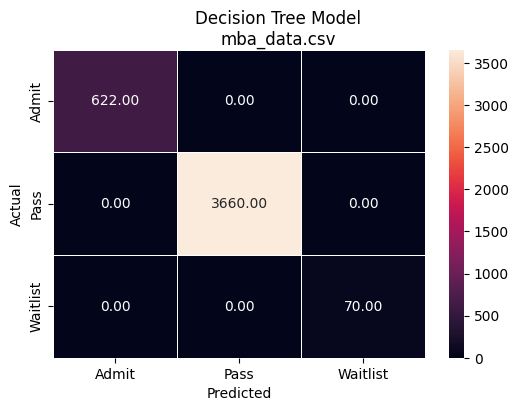

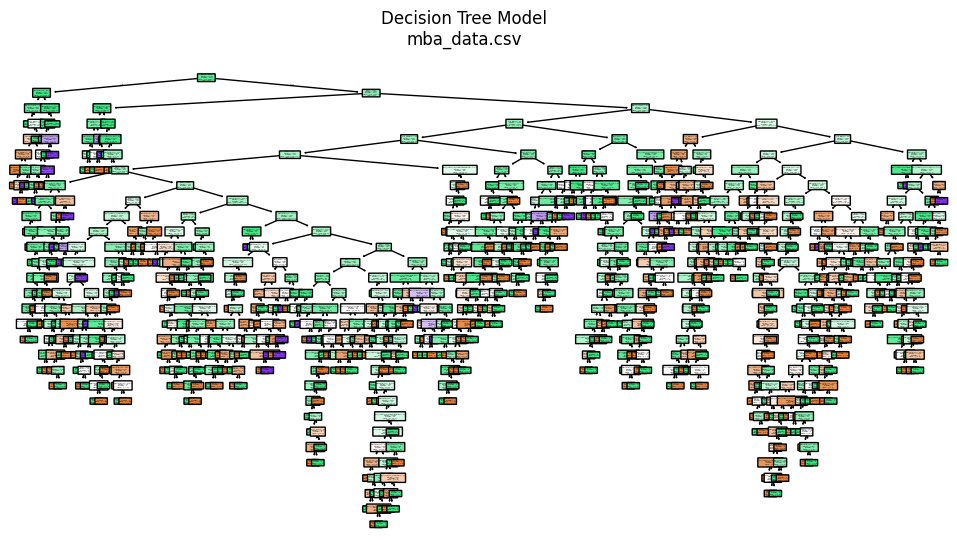

In [56]:
# Visualize Full Set

# Heatmap
fig = plt.figure(figsize=(6,4))
fig.suptitle(f"Decision Tree Model\n{file_name}")
ax = sns.heatmap(cm, annot=True, fmt=".2f", linewidth=.5)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(y_label_classes)
ax.set_yticklabels(y_label_classes)
plt.show()

# Plot Tree
fig = plt.figure(figsize=(12,6))
fig.suptitle(f"Decision Tree Model\n{file_name}")
ax = plot_tree(model, filled=True, feature_names=[str(f) for f in x_feature_names], class_names=[str(f) for f in y_label_classes], rounded=True)
plt.show()

In [57]:
# Model Split Set

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(np_x_feature, np_y_label, test_size=test_size, random_state=random_state)

# Train
model_split = DecisionTreeClassifier(criterion="entropy",random_state=0).fit(x_train, y_train)

# Predict
y_predict_split = model_split.predict(x_test)

# Evaluate
accuracy_split = accuracy_score(y_test, y_predict_split)
cm_split = confusion_matrix(y_test, y_predict_split)
print(f"accuracy_split: {accuracy_split}")
print(f"cm_split: {cm_split}")


accuracy_split: 0.8216911764705882
cm_split: [[ 61  81   2]
 [ 84 830  10]
 [  7  10   3]]


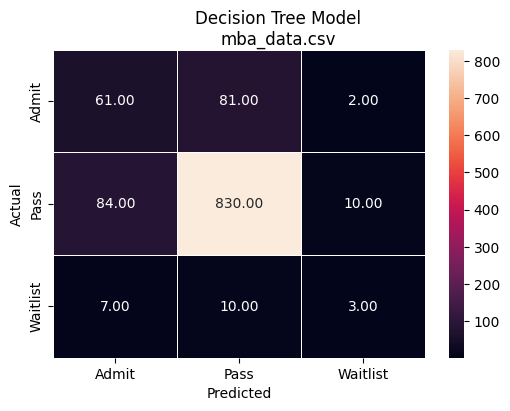

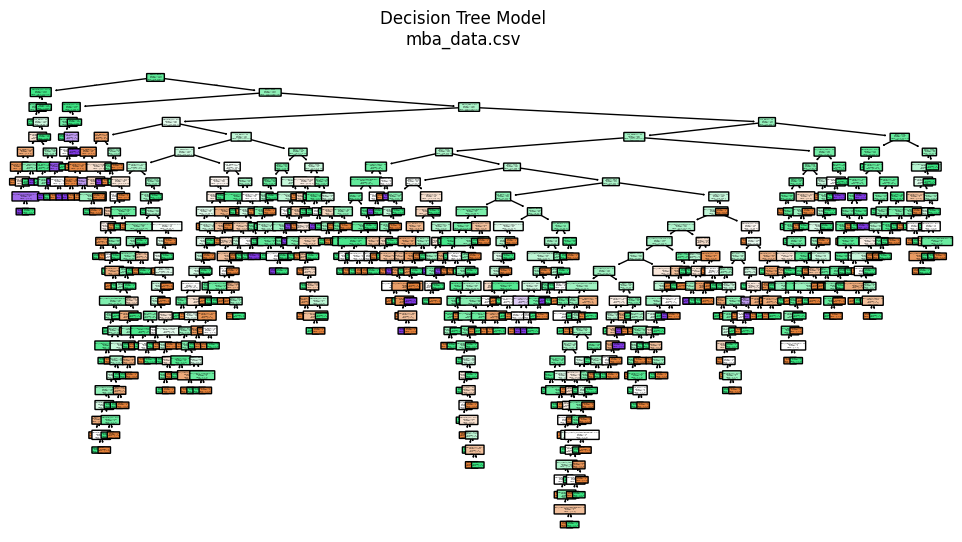

In [58]:
# Visualize Split Set

# Heatmap
fig = plt.figure(figsize=(6,4))
fig.suptitle(f"Decision Tree Model\n{file_name}")
ax = sns.heatmap(cm_split, annot=True, fmt=".2f", linewidth=.5)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(y_label_classes)
ax.set_yticklabels(y_label_classes)
plt.show()

# Plot Tree
fig = plt.figure(figsize=(12,6))
fig.suptitle(f"Decision Tree Model\n{file_name}")
ax = plot_tree(model_split, filled=True, feature_names=[str(f) for f in x_feature_names], class_names=[str(f) for f in y_label_classes], rounded=True)
plt.show()